<a href="https://colab.research.google.com/github/FiddiCoder/-FIA-Project/blob/main/ml_pipeline/Movie_Recommender_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [190]:
import pandas as pd
import numpy as np
import re
from tqdm import tqdm_notebook as tqdm
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

In [191]:
import os
import tarfile
from six.moves import urllib
#download dataset

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/FiddiCoder/-FIA-Project/main/"
FILE_PATH = os.path.join("dataset")
FILE_URL1 = DOWNLOAD_ROOT + "dataset/imdb_top_1000.csv"

def fetch_file_data1(file_url1=FILE_URL1, file_path1=FILE_PATH):
    os.makedirs(file_path1, exist_ok=True)
    csv_path1 = os.path.join(file_path1, "imdb_top_1000.csv")
    urllib.request.urlretrieve(file_url1, csv_path1)

fetch_file_data1()

In [192]:
#load data
datapath = os.path.join("dataset","")
imdb = pd.read_csv(datapath + "imdb_top_1000.csv")

In [193]:
#prova stampa
imdb.head(10)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
5,https://m.media-amazon.com/images/M/MV5BNzA5ZD...,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"
6,https://m.media-amazon.com/images/M/MV5BNGNhMD...,Pulp Fiction,1994,A,154 min,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...",94.0,Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188,"107,928,762"
7,https://m.media-amazon.com/images/M/MV5BNDE4OT...,Schindler's List,1993,A,195 min,"Biography, Drama, History",8.9,"In German-occupied Poland during World War II,...",94.0,Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1213505,"96,898,818"
8,https://m.media-amazon.com/images/M/MV5BMjAxMz...,Inception,2010,UA,148 min,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,74.0,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,"292,576,195"
9,https://m.media-amazon.com/images/M/MV5BMmEzNT...,Fight Club,1999,A,139 min,Drama,8.8,An insomniac office worker and a devil-may-car...,66.0,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,"37,030,102"


In [194]:
#download english stopwards (sinossi dei film in inglese)

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/FiddiCoder/-FIA-Project/main/"
FILE_PATH = os.path.join("dataset")
FILE_URL1 = DOWNLOAD_ROOT + "dataset/stopwords.txt"

def fetch_file_data1(file_url1=FILE_URL1, file_path1=FILE_PATH):
    os.makedirs(file_path1, exist_ok=True)
    csv_path1 = os.path.join(file_path1, "stopwords.txt")
    urllib.request.urlretrieve(file_url1, csv_path1)

fetch_file_data1()

stopwords = open( datapath + "stopwords.txt")
with open(datapath + "stopwords.txt", "r") as f:
    stopwords = f.read().split("\n")

#Contrariamente all'algoritmo di classificazione, ora sembra esserci il problema inverso: i dati numerici sembrano di poca rilevanza

#Eliminazione colonne con dati numerici (Prova 1)

In [195]:
imdb = imdb.drop("Gross", axis=1)
imdb = imdb.drop("Released_Year", axis=1)
imdb = imdb.drop("Runtime", axis=1)
imdb = imdb.drop("IMDB_Rating", axis=1)
imdb = imdb.drop("Meta_score", axis=1)
imdb = imdb.drop("No_of_Votes", axis=1)
imdb = imdb.drop("Certificate", axis=1) #stringa che ha scarsa rilevanza
## Aggiungiamo colonna per feedback
imdb['Like'] = 0


In [196]:
#prova colonna like
imdb.loc[7 , 'Like'] = 1
imdb.loc[14 , 'Like'] = 1
imdb.loc[21 , 'Like'] = 1
imdb.loc[28 , 'Like'] = 1
imdb.loc[35 , 'Like'] = 1
imdb.loc[42 , 'Like'] = -1
imdb.loc[49 , 'Like'] = -1
imdb.loc[56 , 'Like'] = -1
imdb.loc[63 , 'Like'] = -1

In [197]:
imdb.head(10)

,Poster_Link,Series_Title,Genre,Overview,Director,Star1,Star2,Star3,Star4,Like
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,Drama,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,"Crime, Drama",An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,"Action, Crime, Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,"Crime, Drama",The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,"Crime, Drama",A jury holdout attempts to prevent a miscarria...,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,0
5,https://m.media-amazon.com/images/M/MV5BNzA5ZD...,The Lord of the Rings: The Return of the King,"Action, Adventure, Drama",Gandalf and Aragorn lead the World of Men agai...,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,0
6,https://m.media-amazon.com/images/M/MV5BNGNhMD...,Pulp Fiction,"Crime, Drama","The lives of two mob hitmen, a boxer, a gangst...",Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,0
7,https://m.media-amazon.com/images/M/MV5BNDE4OT...,Schindler's List,"Biography, Drama, History","In German-occupied Poland during World War II,...",Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1
8,https://m.media-amazon.com/images/M/MV5BMjAxMz...,Inception,"Action, Adventure, Sci-Fi",A thief who steals corporate secrets through t...,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,0
9,https://m.media-amazon.com/images/M/MV5BMmEzNT...,Fight Club,Drama,An insomniac office worker and a devil-may-car...,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,0


In [198]:
#creazione lista che contiene le parole principali utili all'algoritmo
def crea_lista(row):
    stars = row[["Star1","Star2","Star3","Star4"]].to_list()
    lista = " ".join(row["Series_Title"].split() + row["Genre"].split()*4 + row["Overview"].split() + row["Director"].split()*5 +  row["Star1"].split() *10 +  row["Star2"].split() *8 +  row["Star3"].split()*3 +  row["Star4"].split()*2 )
    #regex che elimina caratteri inutili
    lista = re.sub(r'[^\w\s]', '', lista)
    #rimozione stopwords
    wordlist = lista.split()
    for word in wordlist:
        if word in stopwords:
            lista = lista.replace(" "+word+" ", " ")

    return lista

In [199]:
imdb["target"] = imdb.apply(crea_lista, axis=1) # metodo apply di pandas permette di applicare la funzione crea_lista ad ogni riga, creando una nuova colonna nel dataset
print(imdb.loc[0, 'target'])

The Shawshank Redemption Drama Drama Drama Drama Two imprisoned men bond number years finding solace eventual redemption acts common decency Frank Darabont Frank Darabont Frank Darabont Frank Darabont Frank Darabont Tim Robbins Tim Robbins Tim Robbins Tim Robbins Tim Robbins Tim Robbins Tim Robbins Tim Robbins Tim Robbins Tim Robbins Morgan Freeman Morgan Freeman Morgan Freeman Morgan Freeman Morgan Freeman Morgan Freeman Morgan Freeman Morgan Freeman Bob Gunton Bob Gunton Bob Gunton William Sadler William Sadler


In [200]:
#prova jaccard similarity

def jaccard_similarity(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    return float(len(s1.intersection(s2)) / len(s1.union(s2)))

list1 = imdb.loc[0, 'target'].split()

list2 = imdb.loc[1, 'target'].split()
print(list1)
print(list2)
jaccard_similarity(list1, list2)


['The', 'Shawshank', 'Redemption', 'Drama', 'Drama', 'Drama', 'Drama', 'Two', 'imprisoned', 'men', 'bond', 'number', 'years', 'finding', 'solace', 'eventual', 'redemption', 'acts', 'common', 'decency', 'Frank', 'Darabont', 'Frank', 'Darabont', 'Frank', 'Darabont', 'Frank', 'Darabont', 'Frank', 'Darabont', 'Tim', 'Robbins', 'Tim', 'Robbins', 'Tim', 'Robbins', 'Tim', 'Robbins', 'Tim', 'Robbins', 'Tim', 'Robbins', 'Tim', 'Robbins', 'Tim', 'Robbins', 'Tim', 'Robbins', 'Tim', 'Robbins', 'Morgan', 'Freeman', 'Morgan', 'Freeman', 'Morgan', 'Freeman', 'Morgan', 'Freeman', 'Morgan', 'Freeman', 'Morgan', 'Freeman', 'Morgan', 'Freeman', 'Morgan', 'Freeman', 'Bob', 'Gunton', 'Bob', 'Gunton', 'Bob', 'Gunton', 'William', 'Sadler', 'William', 'Sadler']
['The', 'Godfather', 'Crime', 'Drama', 'Crime', 'Drama', 'Crime', 'Drama', 'Crime', 'Drama', 'An', 'organized', 'crime', 'dynastys', 'aging', 'patriarch', 'transfers', 'control', 'clandestine', 'empire', 'reluctant', 'son', 'Francis', 'Ford', 'Coppola'

0.038461538461538464

In [201]:
# aggiungiamo i film preferiti alla lista
def listone():
  listc=[]
  for i in range(1000):
    if(imdb['Like'].iloc[i] == 1):
      listc.extend(imdb.loc[i,'target'].split())
  return listc


In [202]:
#prova jaccard2
from sklearn.feature_extraction.text import TfidfVectorizer

def jaccard_similarity_pesata(set1, set2):
    # Unisci le parole di entrambi gli insiemi in un unico testo
    text1 = ' '.join(set1)
    text2 = ' '.join(set2)

    # Creazione del vettore TF-IDF
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform([text1, text2])

    # Calcolo della similarità di Jaccard tra i vettori TF-IDF
    similarity = tfidf_matrix[0].multiply(tfidf_matrix[1]).sum() / (tfidf_matrix[0].sum() + tfidf_matrix[1].sum() - tfidf_matrix[0].multiply(tfidf_matrix[1]).sum())

    return similarity

result_list_pesata = np.empty(1000)

list1=listone()

for i in range(1000):
  if(imdb['Like'].iloc[i] == 1 or imdb['Like'].iloc[i] ==-1):
    result_list_pesata[i] = 0
  else:
    list2 = imdb.loc[i, 'target'].split()
    result_list_pesata[i] = jaccard_similarity_pesata(list1, list2)
    print(result_list_pesata[i])



0.002754016736397814
0.003420288941329796
0.0060986294385479735
0.003153954615707077
0.0032810723928678462
0.004012756323429997
0.003365959117330423
0.004746730649356593
0.0026567276272117745
0.003972387352876757
0.002644945774439842
0.0
0.003998356457014455
0.004229224638220867
0.0012930023501369417
0.002613012791074732
0.004392874447534535
0.003696894955776116
0.0034363325644239163
0.0033457442027577107
0.0006416444250941929
0.004904598451320466
0.0031903170713788367
0.002835493388371204
0.0033034487805416626
0.0011881783894355977
0.003150967608455339
0.004002893488345001
0.002675241081215132
0.003598782802986662
0.002654286301190053
0.0063037425611800115
0.004043035586175133
0.0041697916376073904
0.00394653502916928
0.0025466518285240532
0.0013340498281758093
0.006755644978750313
0.0019289460688706695
0.002534959853511168
0.0029316950451695164
0.004156828352239975
7.929736040837109e-05
0.0027959404918989996
0.0030651096630907853
0.0028464761885184987
0.0024205832908306283
0.00434726

In [203]:
#applicazione della jaccard similarity tra le tabelle target di un film e i restanti (array monodimensionale)

def jaccard_similarity(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    return float(len(s1.intersection(s2)) / len(s1.union(s2)))

list1 = listone()
#print(list1)
result_list = np.empty(1000)

for i in range(1000):
  if(imdb['Like'].iloc[i] == 1 or imdb['Like'].iloc[i] ==-1):
    result_list[i] = 0
  else:
    list2 = imdb.loc[i, 'target'].split()
    result_list[i] = jaccard_similarity(list1, list2)
    print(result_list[i])


0.012578616352201259
0.0189873417721519
0.043478260869565216
0.03048780487804878
0.0189873417721519
0.03067484662576687
0.01875
0.04487179487179487
0.006369426751592357
0.031055900621118012
0.018292682926829267
0.006024096385542169
0.030120481927710843
0.030864197530864196
0.022857142857142857
0.012422360248447204
0.03048780487804878
0.01875
0.018867924528301886
0.01935483870967742
0.006060606060606061
0.025477707006369428
0.031055900621118012
0.03125
0.03225806451612903
0.011764705882352941
0.024539877300613498
0.032679738562091505
0.0189873417721519
0.023952095808383235
0.025
0.045454545454545456
0.03205128205128205
0.05228758169934641
0.03225806451612903
0.01935483870967742
0.024390243902439025
0.03205128205128205
0.024844720496894408
0.012345679012345678
0.0392156862745098
0.024242424242424242
0.018633540372670808
0.031446540880503145
0.032679738562091505
0.025
0.006329113924050633
0.04294478527607362
0.03184713375796178
0.018867924528301886
0.012658227848101266
0.04320987654320987

In [204]:
#creazione array contenente i 5 valori più alti ottenuti dalla funzione di jaccard similarity
def Nmaxelements(list1, N):
    final_list = []

    for i in range(0, N):
        max1 = 0

        for j in range(len(list1)):
            if list1[j] > max1:
                max1 = list1[j];

        print(np.where(list1 == max1))
        list1 = list1[list1 != max1]
        final_list.append(max1)

    print(final_list)
    return(final_list)


final_list = Nmaxelements(result_list, 5)

final_list_pesata = Nmaxelements(result_list_pesata, 5)

(array([832]),)
(array([661]),)
(array([595]),)
(array([338]),)
(array([116]),)
[0.06666666666666667, 0.06369426751592357, 0.05844155844155844, 0.056962025316455694, 0.05660377358490566]
(array([359]),)
(array([276]),)
(array([875]),)
(array([630]),)
(array([567]),)
[0.013740472467433706, 0.012959805538881966, 0.01149220434255739, 0.011175044569146479, 0.011122403510515045]


In [205]:
#funzione che mostra il poster del film
def imshow(index):
    url = imdb.loc[index, "Poster_Link"]
    img = Image.open(BytesIO(requests.get(url).content))
    plt.imshow(img)
    plt.show()

Film input:




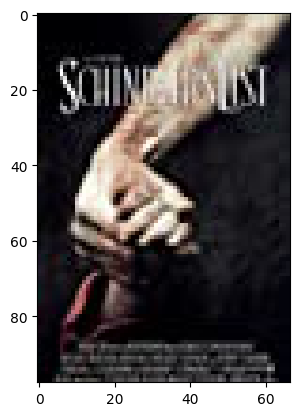

Schindler's List


Steven Spielberg


Biography, Drama, History


Liam Neeson ,Ralph Fiennes ,Ben Kingsley ,Caroline Goodall


In German-occupied Poland during World War II, industrialist Oskar Schindler gradually becomes concerned for his Jewish workforce after witnessing their persecution by the Nazis.
------------------------------


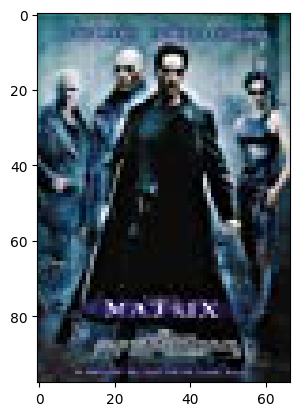

The Matrix


Lana Wachowski


Action, Sci-Fi


Lilly Wachowski ,Keanu Reeves ,Laurence Fishburne ,Carrie-Anne Moss


When a beautiful stranger leads computer hacker Neo to a forbidding underworld, he discovers the shocking truth--the life he knows is the elaborate deception of an evil cyber-intelligence.
------------------------------


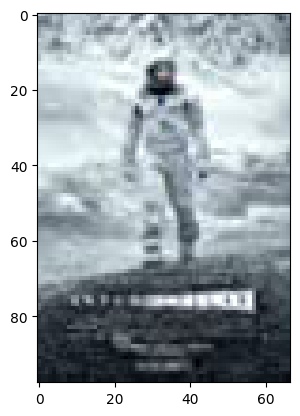

Interstellar


Christopher Nolan


Adventure, Drama, Sci-Fi


Matthew McConaughey ,Anne Hathaway ,Jessica Chastain ,Mackenzie Foy


A team of explorers travel through a wormhole in space in an attempt to ensure humanity's survival.
------------------------------


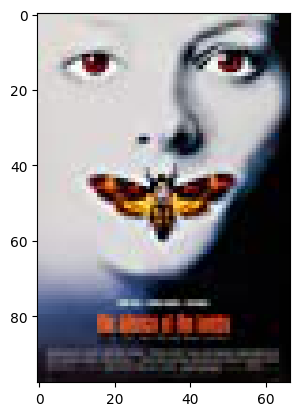

The Silence of the Lambs


Jonathan Demme


Crime, Drama, Thriller


Jodie Foster ,Anthony Hopkins ,Lawrence A. Bonney ,Kasi Lemmons


A young F.B.I. cadet must receive the help of an incarcerated and manipulative cannibal killer to help catch another serial killer, a madman who skins his victims.
------------------------------


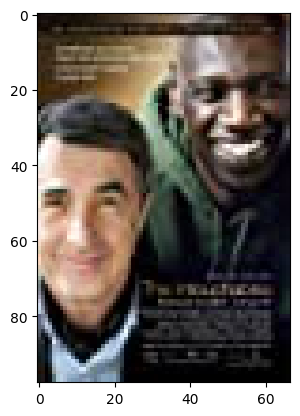

The Intouchables


Olivier Nakache


Biography, Comedy, Drama


Éric Toledano ,François Cluzet ,Omar Sy ,Anne Le Ny


After he becomes a quadriplegic from a paragliding accident, an aristocrat hires a young man from the projects to be his caregiver.
------------------------------






Film consigliati dall algoritmo jaccard:




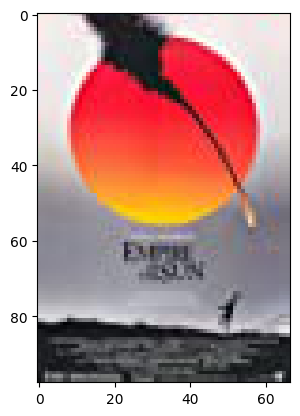

Empire of the Sun


Steven Spielberg


Action, Drama, History


Christian Bale , John Malkovich , Miranda Richardson , Nigel Havers


A young English boy struggles to survive under Japanese occupation during World War II.
------------------------------


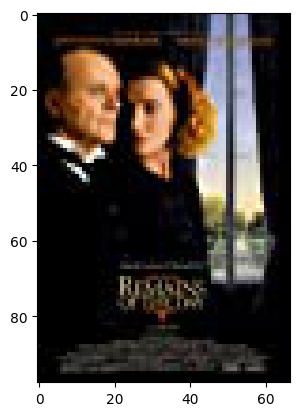

The Remains of the Day


James Ivory


Drama, Romance


Anthony Hopkins , Emma Thompson , John Haycraft , Christopher Reeve


A butler who sacrificed body and soul to service in the years leading up to World War II realizes too late how misguided his loyalty was to his lordly employer.
------------------------------


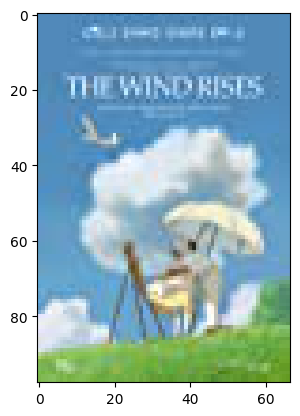

Kaze tachinu


Hayao Miyazaki


Animation, Biography, Drama


Hideaki Anno , Hidetoshi Nishijima , Miori Takimoto , Masahiko Nishimura


A look at the life of Jiro Horikoshi, the man who designed Japanese fighter planes during World War II.
------------------------------


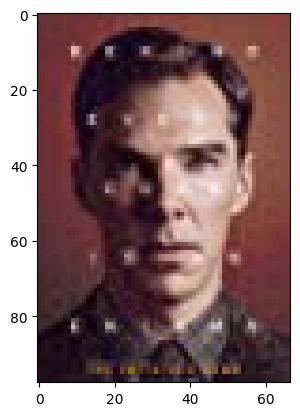

The Imitation Game


Morten Tyldum


Biography, Drama, Thriller


Benedict Cumberbatch , Keira Knightley , Matthew Goode , Allen Leech


During World War II, the English mathematical genius Alan Turing tries to crack the German Enigma code with help from fellow mathematicians.
------------------------------


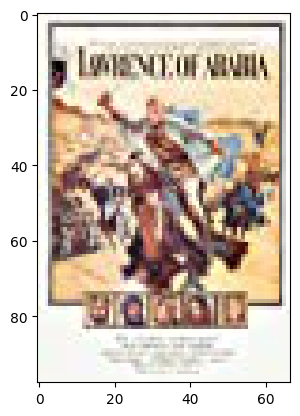

Lawrence of Arabia


David Lean


Adventure, Biography, Drama


Peter O'Toole , Alec Guinness , Anthony Quinn , Jack Hawkins


The story of T.E. Lawrence, the English officer who successfully united and led the diverse, often warring, Arab tribes during World War I in order to fight the Turks.
------------------------------


film consigliati dall algoritmo jaccard pesato: 




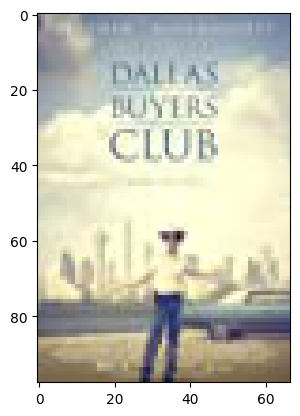

Dallas Buyers Club


Jean-Marc Vallée


Biography, Drama


Matthew McConaughey , Jennifer Garner , Jared Leto , Steve Zahn


In 1985 Dallas, electrician and hustler Ron Woodroof works around the system to help AIDS patients get the medication they need after he is diagnosed with the disease.
------------------------------


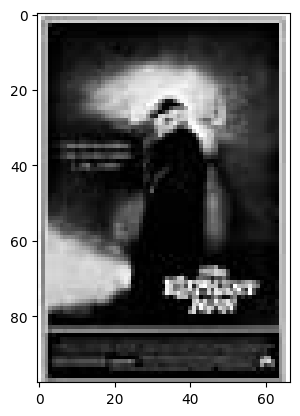

The Elephant Man


David Lynch


Biography, Drama


Anthony Hopkins , John Hurt , Anne Bancroft , John Gielgud


A Victorian surgeon rescues a heavily disfigured man who is mistreated while scraping a living as a side-show freak. Behind his monstrous façade, there is revealed a person of kindness, intelligence and sophistication.
------------------------------


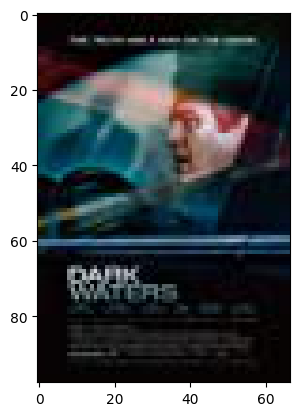

Dark Waters


Todd Haynes


Biography, Drama, History


Mark Ruffalo , Anne Hathaway , Tim Robbins , Bill Pullman


A corporate defense attorney takes on an environmental lawsuit against a chemical company that exposes a lengthy history of pollution.
------------------------------


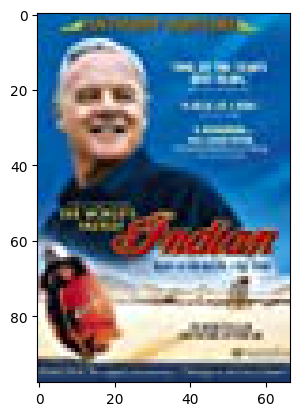

The World's Fastest Indian


Roger Donaldson


Biography, Drama, Sport


Anthony Hopkins , Diane Ladd , Iain Rea , Tessa Mitchell


The story of New Zealander Burt Munro, who spent years rebuilding a 1920 Indian motorcycle, which helped him set the land speed world record at Utah's Bonneville Salt Flats in 1967.
------------------------------


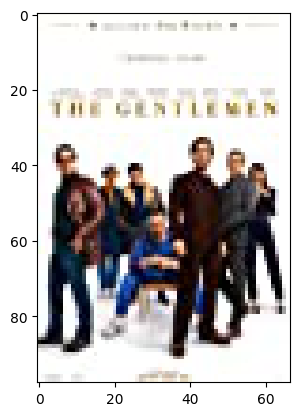

The Gentlemen


Guy Ritchie


Action, Comedy, Crime


Matthew McConaughey , Charlie Hunnam , Michelle Dockery , Jeremy Strong


An American expat tries to sell off his highly profitable marijuana empire in London, triggering plots, schemes, bribery and blackmail in an attempt to steal his domain out from under him.
------------------------------




In [206]:
#film scelto
print('Film input:')
print("\n")
for i in range(1000):
  if(imdb['Like'].iloc[i] == 1):
    imshow(i)
    print(imdb.loc[i].Series_Title)
    print("\n")
    print(imdb.loc[i].Director)
    print("\n")
    print(imdb.loc[i].Genre)
    print("\n")
    print(imdb.loc[i].Star1 + " ," + imdb.loc[i].Star2 + " ," + imdb.loc[i].Star3+ " ," + imdb.loc[i].Star4)
    print("\n")
    print(imdb.loc[i].Overview)
    print('-'*30)

print("\n")
print("\n")

print("\n")
print('Film consigliati dall algoritmo jaccard:')
print("\n")
#output dei 5 film consigliati rispetto al film dato in input
for i in range(len(final_list)):
  for j in range(len(result_list)):
    if(final_list[i]==result_list[j]):
      imshow(j)
      print(imdb.loc[j].Series_Title)
      print("\n")
      print(imdb.loc[j].Director)
      print("\n")
      print(imdb.loc[j].Genre)
      print("\n")
      print(imdb.loc[j].Star1 + " , " + imdb.loc[j].Star2 + " , " + imdb.loc[j].Star3+ " , " + imdb.loc[j].Star4 )
      print("\n")
      print(imdb.loc[j].Overview)
      print('-'*30)

print("\n")
print("film consigliati dall algoritmo jaccard pesato: ")
print("\n")

for i in range(len(final_list_pesata)):
  for j in range(len(result_list_pesata)):
    if(final_list_pesata[i]==result_list_pesata[j]):
      imshow(j)
      print(imdb.loc[j].Series_Title)
      print("\n")
      print(imdb.loc[j].Director)
      print("\n")
      print(imdb.loc[j].Genre)
      print("\n")
      print(imdb.loc[j].Star1 + " , " + imdb.loc[j].Star2 + " , " + imdb.loc[j].Star3+ " , " + imdb.loc[j].Star4 )
      print("\n")
      print(imdb.loc[j].Overview)
      print('-'*30)

print("\n")

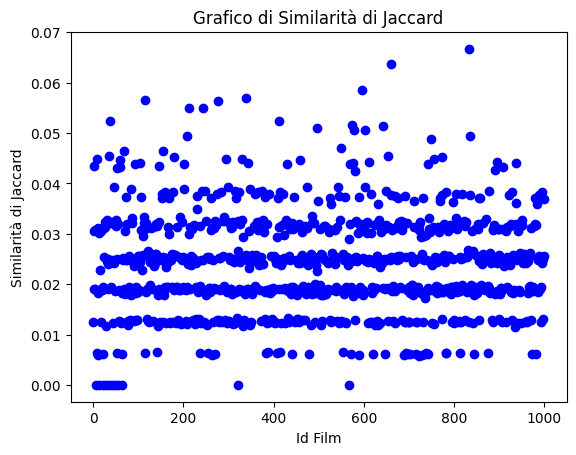

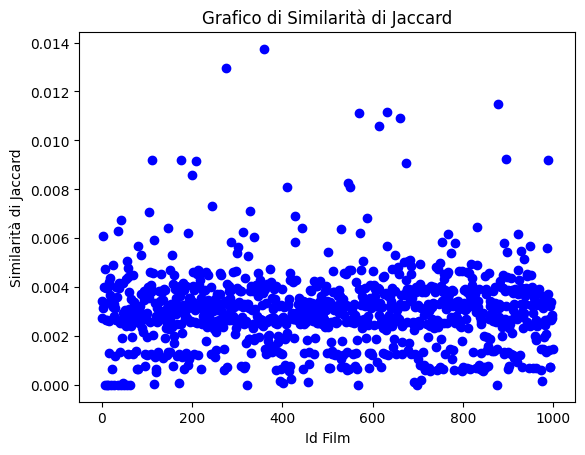

In [207]:


import matplotlib.pyplot as plt

# Dati di esempio

similarity_scores = result_list  # Valori di similarità

x_values = range(len(similarity_scores))  # Coordinate x per i punti



# Creazione del grafico

plt.scatter(x_values, similarity_scores, color='b', marker='o')

plt.xlabel('Id Film')

plt.ylabel('Similarità di Jaccard')

plt.title('Grafico di Similarità di Jaccard')



# Visualizzazione del grafico

plt.show()

#DATI PER LA JACCARD PESATA
# Dati di esempio

similarity_scores = result_list_pesata  # Valori di similarità

x_values = range(len(similarity_scores))  # Coordinate x per i punti



# Creazione del grafico

plt.scatter(x_values, similarity_scores, color='b', marker='o')

plt.xlabel('Id Film')

plt.ylabel('Similarità di Jaccard')

plt.title('Grafico di Similarità di Jaccard')



# Visualizzazione del grafico

plt.show()

